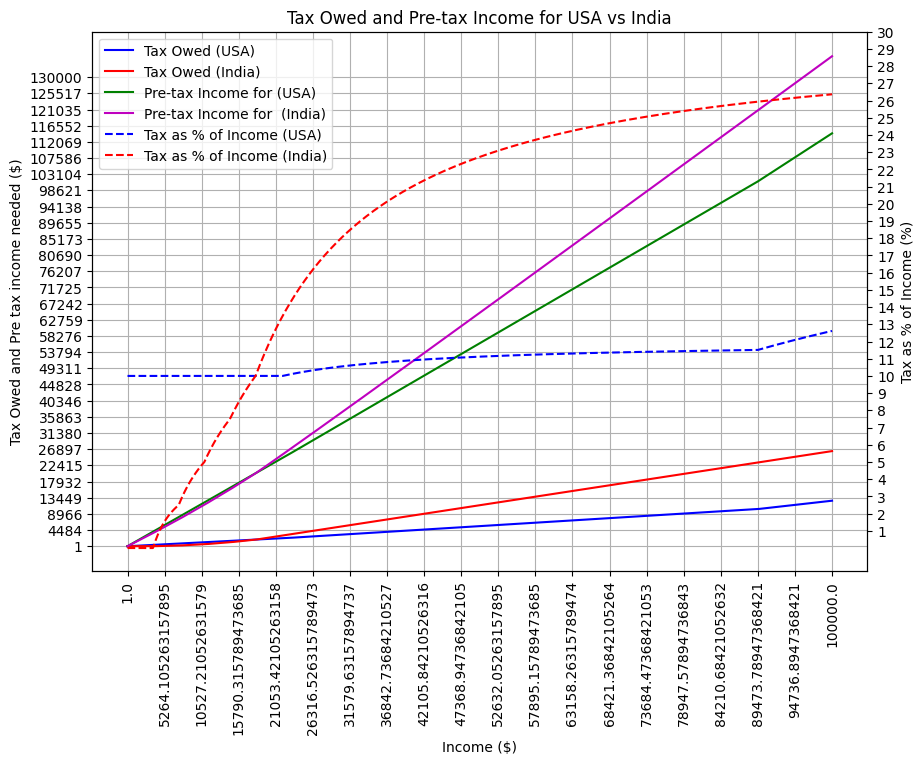

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tax calculation function for USA
def calculate_tax_usa(income):
    brackets = [
        (0, 22000, 0.10),
        (22001, 89450, 0.12),
        (89451, 190750, 0.22),
        (190751, 364200, 0.24),
        (364201, 462500, 0.32),
        (462501, 693750, 0.35),
        (693751, float('inf'), 0.37)
    ]
    
    tax = 0
    for start, end, rate in brackets:
        if income > start:
            taxable_income = min(income, end) - start
            tax += taxable_income * rate
        else:
            break

    tax_percent = (tax / income) * 100 if income > 0 else 0
    pre_tax_income = income / (1 - tax_percent / 100) if tax_percent != 0 else income
    return tax, tax_percent, pre_tax_income

# Define the tax calculation function for India
def calculate_tax_india(income):
    # Convert income to INR
    income_inr = income * 82.5
    
    brackets = [
        (0, 250000, 0.00),
        (250001, 300000, 0.00),
        (300001, 500000, 0.05),
        (500001, 600000, 0.05),
        (600001, 900000, 0.10),
        (900001, 1000000, 0.15),
        (1000001, 1200000, 0.15),
        (1200001, 1500000, 0.20),
        (1500001, 200000000, 0.30)
    ]
    
    tax = 0
    for start, end, rate in brackets:
        if income_inr > start:
            taxable_income = min(income_inr, end) - start
            tax += taxable_income * rate
        else:
            break

    # Convert tax back to USD
    tax_usd = tax / 82.5
    tax_percent = (tax_usd / income) * 100 if income > 0 else 0
    pre_tax_income = income / (1 - tax_percent / 100) if tax_percent != 0 else income
    return tax_usd, tax_percent, pre_tax_income

Max_post_tax = 100000
# Generate income values up to 1 million
incomes = np.linspace(1, Max_post_tax, 1000)
taxes_usa, tax_percent_usa, pre_tax_income_usa = np.array([calculate_tax_usa(income) for income in incomes]).T
taxes_india, tax_percent_india, pre_tax_income_india = np.array([calculate_tax_india(income) for income in incomes]).T

# Plot the graphs
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot tax owed
ax1.plot(incomes, taxes_usa, label='Tax Owed (USA)', color='b')
ax1.plot(incomes, taxes_india, label='Tax Owed (India)', color='r')
ax1.set_xlabel('Income ($)')
ax1.set_ylabel('Tax Owed and Pre tax income needed ($)')
ax1.tick_params(axis='y')

# Create a secondary y-axis for tax as percent of income
ax2 = ax1.twinx()
ax2.plot(incomes, tax_percent_usa, label='Tax as % of Income (USA)', linestyle='--', color='b')
ax2.plot(incomes, tax_percent_india, label='Tax as % of Income (India)', linestyle='--', color='r')
ax2.set_ylabel('Tax as % of Income (%)')

# USA
pre_tax_income_for_usa = np.array([calculate_tax_usa(income)[2] for income in incomes])
ax1.plot(incomes, pre_tax_income_for_usa, label=f'Pre-tax Income for (USA)', color='g')

# India
pre_tax_income_for_india = np.array([calculate_tax_india(income)[2] for income in incomes])
ax1.plot(incomes, pre_tax_income_for_india, label=f'Pre-tax Income for  (India)', color='m')

# Title and grid
ax1.set_title(f'Tax Owed and Pre-tax Income for USA vs India')
ax1.grid(True)

# # Set more x ticks
ax1.set_xticks(np.linspace(1, Max_post_tax, 20))
# Rotate x-axis ticks to 90 degrees
ax1.set_xticklabels(ax1.get_xticks(), rotation=90)

# Set more y ticks for ax1
ax1.set_yticks(np.linspace(1, Max_post_tax*1.3, 30))
ax2.set_yticks(np.linspace(1, 30, 30))
# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


In [2]:
'''
Year	Annual Returns With Dividends
1995 	37.20%
1996 	22.68% 
1997 	33.10% 
1998 	28.34% 
1999 	20.89%
2000 	-9.03% 
2001 	-11.85% 
2002 	-21.97% 
2003 	28.36% 
2004 	10.74% 
2005	4.83% 
2006 	15.61% 
2007 	5.48% 
2008 	-36.55 
2009 	25.94% 
2010 	14.82% 
2011 	2.10% 
2012 	15.89% 
2013 	32.15%
2014 	13.52% 
2015 	1.38% 
2016	11.77
2017	21.61
2018 	-4.23
2019 	31.21% 
2020 	18.02%
2021	28.47%
2022	-18.01% 

India Inflation Rate - Historical Data
Year	Inflation Rate (%)	Annual Change
2022	6.70%	1.57%
2021	5.13%	-1.49%
2020	6.62%	2.89%
2019	3.73%	-0.21%
2018	3.94%	0.61%
2017	3.33%	-1.62%
2016	4.95%	0.04%
2015	4.91%	-1.76%
2014	6.67%	-3.35%
2013	10.02%	0.54%
2012	9.48%	0.57%
2011	8.91%	-3.08%
2010	11.99%	1.11%
2009	10.88%	2.53%
2008	8.35%	1.98%
2007	6.37%	0.58%
2006	5.80%	1.55%
2005	4.25%	0.48%
2004	3.77%	-0.04%
2003	3.81%	-0.49%
2002	4.30%	0.52%
2001	3.78%	-0.23%
2000	4.01%	-0.66%
1999	4.67%	-8.56%
1998	13.23%	6.07%
1997	7.16%	-1.81%
1996	8.98%	-1.25%
1995	10.22%	-0.02%
1994	10.25%	3.92%

Date	Price	Open	High	Low	Vol.	Change %
6/1/2024	83.655	83.461	85.193	82.975		0.28%
5/1/2024	83.424	83.499	83.618	83.032		-0.03%
4/1/2024	83.45	83.343	83.747	83.147		0.12%
3/1/2024	83.35	82.926	83.733	82.645		0.54%
2/1/2024	82.9	83.083	83.127	82.812		-0.23%
1/1/2024	83.095	83.24	83.359	82.767		-0.11%
12/1/2023	83.19	83.356	83.465	82.91		-0.20%
11/1/2023	83.357	83.278	83.499	82.906		0.12%
10/1/2023	83.256	83.165	83.348	82.956		0.27%
9/1/2023	83.03	82.647	83.36	82.576		0.40%
8/1/2023	82.702	82.24	83.467	82.222		0.56%
7/1/2023	82.24	82.061	82.821	81.666		0.18%
6/1/2023	82.091	82.666	82.697	81.841		-0.71%
5/1/2023	82.68	81.795	82.953	81.65		1.17%
4/1/2023	81.72	82.391	82.484	81.547		-0.54%
3/1/2023	82.16	82.588	82.92	81.61		-0.58%
2/1/2023	82.64	81.765	83.047	81.676		1.10%
1/1/2023	81.739	82.67	83.038	80.874		-1.18%
12/1/2022	82.717	81.151	82.993	80.985		1.67%
11/1/2022	81.359	82.817	82.996	80.483		-1.70%
10/1/2022	82.77	81.532	83.268	81.284		1.55%
9/1/2022	81.509	79.535	82.02	79.01		2.54%
8/1/2022	79.491	79.185	80.135	78.393		0.20%
7/1/2022	79.336	78.97	80.235	78.805		0.49%
6/1/2022	78.95	77.646	79.095	77.38		1.78%
5/1/2022	77.569	76.505	77.915	75.99		1.37%
4/1/2022	76.52	75.925	76.806	75.266		0.82%
3/1/2022	75.901	75.289	77.187	75.26		0.54%
2/1/2022	75.493	74.563	75.848	74.343		1.29%
1/1/2022	74.529	74.463	75.327	73.748		0.08%
12/1/2021	74.467	75.08	76.419	74.093		-0.83%
11/1/2021	75.09	74.96	75.201	73.834		0.23%
10/1/2021	74.915	74.185	75.683	74.081		1.01%
9/1/2021	74.164	72.992	74.368	72.913		1.67%
8/1/2021	72.947	74.368	74.514	72.907		-1.87%
7/1/2021	74.337	74.374	75.031	74.218		-0.03%
6/1/2021	74.36	72.508	74.471	72.483		2.55%
5/1/2021	72.511	74.279	74.332	72.315		-2.08%
4/1/2021	74.05	73.169	75.57	73.155		1.25%
3/1/2021	73.137	73.585	73.783	72.268		-1.06%
2/1/2021	73.92	72.918	74.06	72.263		1.43%
1/1/2021	72.877	73.1	73.6	72.785		-0.22%
12/1/2020	73.036	74.025	74.104	72.951		-1.29%
11/1/2020	73.99	74.567	75.015	73.637		-0.76%
10/1/2020	74.554	73.595	74.712	72.969		1.35%
9/1/2020	73.56	73.215	74.055	72.753		0.42%
8/1/2020	73.254	74.918	75.314	73.05		-2.22%
7/1/2020	74.916	75.525	75.625	74.488		-0.83%
6/1/2020	75.54	75.47	76.4	74.973		-0.07%
5/1/2020	75.59	75.319	76.145	75.038		0.68%
4/1/2020	75.077	75.32	77.01	74.909		-0.34%
3/1/2020	75.333	72.527	76.385	72.026		3.86%
2/1/2020	72.534	71.525	72.574	71.088		1.39%
1/1/2020	71.54	71.365	72.125	70.678		0.27%
12/1/2019	71.35	71.785	71.825	70.51		-0.55%
11/1/2019	71.746	70.975	72.245	70.555		1.08%
10/1/2019	70.978	70.66	71.725	70.66		0.48%
9/1/2019	70.64	71.455	72.409	70.354		-1.14%
8/1/2019	71.451	69.257	72.262	68.999		3.76%
7/1/2019	68.86	68.962	69.16	68.282		-0.12%
6/1/2019	68.94	69.607	69.992	68.868		-0.91%
5/1/2019	69.57	69.58	70.649	69.095		-0.09%
4/1/2019	69.636	69.342	70.34	68.384		0.66%
3/1/2019	69.18	70.826	71	68.35		-2.33%
2/1/2019	70.83	71.105	71.852	70.398		-0.17%
1/1/2019	70.95	69.635	71.529	69.239		2.00%
12/1/2018	69.56	69.875	72.646	69.57		-0.11%
11/1/2018	69.64	73.855	73.872	69.565		-5.83%
10/1/2018	73.95	72.605	74.485	72.605		2.00%
9/1/2018	72.5	70.79	72.985	70.725		2.11%
8/1/2018	71	68.555	71.025	68.265		3.73%
7/1/2018	68.45	68.49	69.128	68.275		0.00%
6/1/2018	68.45	67.455	69.095	66.84		1.53%
5/1/2018	67.42	66.455	68.48	66.45		1.46%
4/1/2018	66.45	65.12	66.975	64.848		2.06%
3/1/2018	65.11	65.205	65.295	64.728		-0.14%
2/1/2018	65.2	63.645	65.314	63.555		2.61%
1/1/2018	63.54	63.855	64.125	63.245		-0.45%
12/1/2017	63.83	64.5	64.73	63.785		-1.01%
11/1/2017	64.48	64.705	65.545	64.275		-0.40%
10/1/2017	64.74	65.595	65.637	64.69		-0.87%
9/1/2017	65.305	63.925	65.895	63.778		2.15%
8/1/2017	63.93	64.105	64.326	63.565		-0.37%
7/1/2017	64.17	64.655	64.908	64.048		-0.69%
6/1/2017	64.615	64.488	64.84	64.166		0.17%
5/1/2017	64.505	64.285	65.025	63.985		0.37%
4/1/2017	64.27	64.805	65.185	63.925		-0.89%
3/1/2017	64.85	66.72	66.92	64.795		-2.77%
2/1/2017	66.7	67.655	67.688	66.595		-1.17%
1/1/2017	67.49	67.955	68.505	67.44		-0.67%
12/1/2016	67.945	68.595	68.597	67.314		-0.94%
11/1/2016	68.588	66.685	68.905	66.227		2.87%
10/1/2016	66.675	66.555	67.005	66.381		0.19%
9/1/2016	66.546	66.962	67.148	66.272		-0.62%
8/1/2016	66.963	66.72	67.37	66.58		0.50%
7/1/2016	66.63	67.509	67.585	66.625		-1.28%
6/1/2016	67.493	67.207	68.237	66.451		0.44%
5/1/2016	67.199	66.425	67.78	66.23		1.18%
4/1/2016	66.415	66.355	66.848	66.024		0.25%
3/1/2016	66.25	68.206	68.355	66.13		-2.86%
2/1/2016	68.198	67.878	68.909	67.495		0.49%
1/1/2016	67.868	66.209	68.26	66.125		2.52%
12/1/2015	66.198	66.462	67.18	65.946		-0.38%
11/1/2015	66.452	65.413	66.945	65.33		1.59%
10/1/2015	65.413	65.524	65.7	64.64		-0.14%
9/1/2015	65.507	66.398	66.913	65.48		-1.35%
8/1/2015	66.402	63.996	66.91	63.65		3.79%
7/1/2015	63.978	63.609	64.27	63.254		0.60%
6/1/2015	63.594	63.733	64.33	63.42		-0.22%
5/1/2015	63.733	63.531	64.39	63.305		0.34%
4/1/2015	63.52	62.292	63.78	61.93		1.99%
3/1/2015	62.281	61.713	63.14	61.659		1.03%
2/1/2015	61.649	62.005	62.54	61.557		-0.58%
1/1/2015	62.01	63.175	63.625	61.265		-1.62%
12/1/2014	63.03	62.06	63.885	61.768		1.34%
11/1/2014	62.195	61.505	62.25	61.295		1.31%
10/1/2014	61.39	61.83	61.958	60.903		-0.86%
9/1/2014	61.925	60.52	61.94	60.201		2.35%
8/1/2014	60.505	60.745	61.743	60.357		-0.07%
7/1/2014	60.55	60.085	60.565	59.53		0.84%
6/1/2014	60.045	59.11	60.535	58.975		1.46%
5/1/2014	59.18	60.27	60.28	58.26		-1.92%
4/1/2014	60.34	59.935	61.193	59.575		0.56%
3/1/2014	60.005	61.955	62.145	59.685		-2.89%
2/1/2014	61.79	62.705	62.84	61.755		-1.42%
1/1/2014	62.68	61.826	63.322	61.316		1.42%
12/1/2013	61.8	62.355	62.541	60.835		-0.96%
11/1/2013	62.399	61.51	63.91	61.51		1.26%
10/1/2013	61.624	62.56	62.57	60.94		-1.54%
9/1/2013	62.59	66.115	68.615	61.66		-4.74%
8/1/2013	65.705	60.755	68.805	60.23		7.97%
7/1/2013	60.855	59.475	61.225	58.708		2.22%
6/1/2013	59.533	56.51	60.77	56.31		5.22%
5/1/2013	56.58	53.81	56.77	53.64		5.39%
4/1/2013	53.685	54.265	54.945	53.655		-1.11%
3/1/2013	54.285	54.365	55.135	53.895		-0.16%
2/1/2013	54.37	53.215	54.615	52.885		2.06%
1/1/2013	53.275	55.005	55.395	53.075		-3.13%
12/1/2012	54.995	54.355	55.285	54.02		1.35%
11/1/2012	54.265	53.805	55.885	53.602		0.85%
10/1/2012	53.805	52.825	54.209	51.355		1.80%
9/1/2012	52.855	55.537	56.04	52.505		-4.81%
8/1/2012	55.525	55.655	56.2	54.96		-0.06%
7/1/2012	55.56	55.49	56.44	54.18		0.09%
6/1/2012	55.51	56.085	57.335	54.83		-0.95%
5/1/2012	56.04	52.74	56.53	52.49		6.41%
4/1/2012	52.665	50.855	52.88	50.524		3.52%
3/1/2012	50.875	49.01	51.49	49.01		3.59%
2/1/2012	49.11	49.51	49.77	48.61		-0.82%
1/1/2012	49.515	53.27	53.355	49.247		-6.60%
12/1/2011	53.015	52.095	54.325	50.945		1.70%
11/1/2011	52.13	48.6	52.735	48.6		7.05%
10/1/2011	48.695	48.965	50.325	48.535		-0.66%
9/1/2011	49.02	45.75	49.895	45.66		7.03%
8/1/2011	45.8	44.11	46.225	43.97		3.60%
7/1/2011	44.21	44.66	44.77	43.86		-1.10%
6/1/2011	44.7	45.01	45.15	44.53		-0.80%
5/1/2011	45.06	44.215	45.433	44.145		1.82%
4/1/2011	44.255	44.495	44.71	43.897		-0.63%
3/1/2011	44.535	45.275	45.377	44.515		-1.61%
2/1/2011	45.265	45.905	45.935	44.865		-1.22%
1/1/2011	45.825	44.635	46.035	44.535		2.49%
12/1/2010	44.713	45.892	45.892	44.582		-2.37%
11/1/2010	45.8	44.29	46.13	43.83		3.33%
10/1/2010	44.325	44.545	44.835	43.985		-0.55%
9/1/2010	44.57	47.03	47.03	44.55		-5.30%
8/1/2010	47.065	46.325	47.15	45.715		1.42%
7/1/2010	46.405	46.345	47.415	46.225		-0.09%
6/1/2010	46.445	46.305	47.455	45.495		0.17%
5/1/2010	46.365	44.205	47.745	44.185		4.72%
4/1/2010	44.275	44.925	44.925	44.075		-1.23%
3/1/2010	44.825	46.105	46.168	44.775		-2.78%
2/1/2010	46.105	46.175	46.89	45.745		-0.04%
1/1/2010	46.125	46.63	46.697	45.115		-0.61%
12/1/2009	46.41	46.35	47.04	45.87		-0.27%
11/1/2009	46.535	47.005	47.445	45.775		-0.83%
10/1/2009	46.925	47.725	47.935	45.795		-1.70%
9/1/2009	47.735	48.665	49.215	47.715		-1.96%
8/1/2009	48.69	47.71	49.06	47.15		1.81%
7/1/2009	47.825	48.025	49.47	47.575		0.16%
6/1/2009	47.75	47.09	48.95	46.58		1.34%
5/1/2009	47.12	49.72	50.03	46.67		-5.24%
4/1/2009	49.725	50.685	50.735	49.345		-1.67%
3/1/2009	50.57	50.83	52.14	50.03		-0.85%
2/1/2009	51.005	48.675	51.195	48.185		4.41%
1/1/2009	48.85	48.7	49.35	47.93		0.47%
12/1/2008	48.62	49.39	50.62	46.44		-1.93%
11/1/2008	49.575	49.125	50.595	46.725		0.51%
10/1/2008	49.325	46.705	50.315	46.055		5.36%
9/1/2008	46.815	43.615	47.125	43.465		6.71%
8/1/2008	43.87	42.38	44.16	41.76		3.26%
7/1/2008	42.483	42.813	43.563	41.743		-1.04%
6/1/2008	42.93	42.22	43.14	42.12		1.83%
5/1/2008	42.16	40.59	43.21	40.26		4.20%
4/1/2008	40.46	39.95	40.66	39.61		1.07%
3/1/2008	40.03	39.79	40.84	39.61		0.28%
2/1/2008	39.92	39.19	40.25	39.12		1.63%
1/1/2008	39.28	39.41	39.79	39.03		-0.32%
12/1/2007	39.405	39.475	39.695	39.125		-0.29%
11/1/2007	39.52	39.17	39.92	39.02		0.83%
10/1/2007	39.195	39.565	39.975	39.095		-1.17%
9/1/2007	39.66	40.64	41	39.41		-2.41%
8/1/2007	40.64	40.17	41.725	40.15		1.12%
7/1/2007	40.19	40.61	40.75	40.06		-0.83%
6/1/2007	40.525	40.325	41.245	40.155		0.37%
5/1/2007	40.375	41.165	41.485	40.155		-1.63%
4/1/2007	41.045	43.155	43.335	40.555		-4.81%
3/1/2007	43.12	44.07	44.715	42.77		-2.20%
2/1/2007	44.09	44.08	44.38	43.85		0.02%
1/1/2007	44.08	44.13	44.635	44.01		-0.08%
12/1/2006	44.115	44.575	44.935	44.085		-1.09%
11/1/2006	44.6	44.91	45.38	44.36		-0.71%
10/1/2006	44.92	45.8	45.905	44.82		-2.16%
9/1/2006	45.91	46.37	46.56	45.69		-1.23%
8/1/2006	46.48	46.48	46.8	46.32		-0.04%
7/1/2006	46.5	45.83	47.05	45.81		1.35%
6/1/2006	45.88	46.21	46.48	45.61		-0.92%
5/1/2006	46.305	44.895	46.56	44.695		3.13%
4/1/2006	44.9	44.47	45.42	44.41		0.90%
3/1/2006	44.5	44.22	44.77	44.11		0.51%
2/1/2006	44.275	43.925	44.67	43.925		0.80%
1/1/2006	43.925	45.115	45.155	43.925		-2.38%
12/1/2005	44.995	45.845	46.412	44.865		-1.95%
11/1/2005	45.89	45.03	46.06	45.03		1.82%
10/1/2005	45.07	43.9	45.435	43.88		2.54%
9/1/2005	43.955	44.015	44.16	43.725		-0.14%
8/1/2005	44.015	43.405	44.185	43.335		1.32%
7/1/2005	43.44	43.44	43.725	43.04		-0.10%
6/1/2005	43.485	43.69	43.835	43.365		-0.49%
5/1/2005	43.7	43.63	43.828	43.18		0.62%
4/1/2005	43.43	43.68	43.9	43.43		-0.56%
3/1/2005	43.675	43.665	43.887	43.435		0.09%
2/1/2005	43.635	43.665	43.94	43.305		-0.02%
1/1/2005	43.645	43.425	44.135	43.335		0.91%
12/1/2004	43.25	44.54	44.79	43.25		-2.81%
11/1/2004	44.5	45.36	45.57	44.5		-1.84%
10/1/2004	45.335	45.915	45.96	45.305		-1.28%
9/1/2004	45.925	46.275	46.392	45.715		-0.84%
8/1/2004	46.315	46.435	46.525	46.145		-0.13%
7/1/2004	46.375	45.965	46.54	45.605		0.87%
6/1/2004	45.975	45.425	46.345	44.885		1.09%
5/1/2004	45.48	44.44	46	44.38		2.27%
4/1/2004	44.47	43.3	44.56	43.3		2.58%
3/1/2004	43.35	45.24	45.382	43.35		-4.10%
2/1/2004	45.205	45.245	45.37	45.145		-0.14%
1/1/2004	45.27	45.625	45.75	45.21		-0.78%
12/1/2003	45.625	45.755	45.825	45.435		-0.32%
11/1/2003	45.77	45.28	46.02	45.21		0.99%
10/1/2003	45.32	45.76	45.78	45.16		-0.72%
9/1/2003	45.65	45.86	46.12	45.65		-0.46%
8/1/2003	45.86	46.14	46.23	45.72		-0.66%
7/1/2003	46.165	46.345	46.57	46.005		-0.53%
6/1/2003	46.41	47.05	47.3	46.35		-1.30%
5/1/2003	47.02	47.375	47.405	46.797		-0.63%
4/1/2003	47.32	47.48	47.53	47.25		-0.34%
3/1/2003	47.48	47.69	47.88	47.43		-0.27%
2/1/2003	47.61	47.75	47.97	47.55		-0.40%
1/1/2003	47.8	48.052	48.085	47.75		-0.31%
12/1/2002	47.95	48.317	48.4	47.91		-0.75%
11/1/2002	48.31	48.34	48.4	48.16		-0.06%
10/1/2002	48.34	48.39	48.53	48.25		-0.02%
9/1/2002	48.35	48.52	48.63	48.35		-0.25%
8/1/2002	48.47	48.69	48.767	48.35		-0.35%
7/1/2002	48.64	48.92	48.925	48.64		-0.45%
6/1/2002	48.86	49.05	49.105	48.8		-0.31%
5/1/2002	49.01	48.97	49.12	48.9		0.16%
4/1/2002	48.93	48.78	49.102	48.77		0.31%
3/1/2002	48.78	48.71	48.9	48.65		0.14%
2/1/2002	48.71	48.51	48.93	48.5		0.41%
1/1/2002	48.51	48.3	48.655	48.05		0.60%
12/1/2001	48.22	47.96	48.4	47.75		0.61%
11/1/2001	47.93	48.01	48.45	47.8		-0.13%
10/1/2001	47.99	47.91	48.26	47.72		0.29%
9/1/2001	47.85	47.145	48.135	47.12		1.55%
8/1/2001	47.12	47.15	47.25	47.06		-0.02%
7/1/2001	47.13	47.04	47.62	47.03		0.19%
6/1/2001	47.04	46.99	47.13	46.85		0.09%
5/1/2001	47	46.89	47.147	46.667		0.34%
4/1/2001	46.84	46.67	47.1	46.53		0.28%
3/1/2001	46.71	46.69	47.04	46.35		0.37%
2/1/2001	46.54	46.43	46.717	46.3		0.32%
1/1/2001	46.39	46.7	46.821	46.33		-0.62%
12/1/2000	46.68	46.87	46.927	46.535		-0.41%
11/1/2000	46.87	46.83	46.977	46.46		0.05%
10/1/2000	46.845	46.105	46.965	45.955		1.88%
9/1/2000	45.98	45.8	46.48	45.58		0.38%
8/1/2000	45.805	45.075	46.155	44.905		1.68%
7/1/2000	45.05	44.74	45.17	44.355		0.90%
6/1/2000	44.65	44.61	45.05	44.55		0.17%
5/1/2000	44.575	43.727	44.815	43.625		2.12%
4/1/2000	43.65	43.65	43.715	43.59		0.11%
3/1/2000	43.6	43.66	43.672	43.5		-0.03%
2/1/2000	43.614	43.623	43.704	43.504		-0.03%
1/1/2000	43.625	43.505	43.775	43.375		0.29%
12/1/1999	43.5	43.412	43.558	43.305		0.22%
11/1/1999	43.405	43.425	43.815	43.075		-0.03%
10/1/1999	43.42	43.63	43.897	43.1		-0.48%
9/1/1999	43.63	43.56	43.92	43.45		0.31%
8/1/1999	43.495	43.33	43.6	43.015		0.33%
7/1/1999	43.35	43.4	43.62	43.2		-0.07%
6/1/1999	43.38	42.97	43.49	42.82		1.24%
5/1/1999	42.85	42.79	43.15	42.65		0.09%
4/1/1999	42.81	42.43	43.13	42.25		0.96%
3/1/1999	42.405	42.595	42.715	42.165		-0.64%
2/1/1999	42.68	42.6	42.85	42.4		0.45%
1/1/1999	42.49	42.5	42.632	42.4		0.05%
12/1/1998	42.47	42.55	42.727	42.4		-0.21%
11/1/1998	42.56	42.27	42.75	42.2		0.44%
10/1/1998	42.375	42.425	42.542	42.175		-0.13%
9/1/1998	42.43	42.56	42.615	42.25		-0.22%
8/1/1998	42.525	42.575	43.805	42.375		-0.06%
7/1/1998	42.55	42.42	42.75	42.05		0.35%
6/1/1998	42.4	41.71	43.07	41.45		1.80%
5/1/1998	41.65	39.65	41.88	39.65		4.87%
4/1/1998	39.715	39.445	39.785	39.275		0.53%
3/1/1998	39.505	39.315	39.625	39.069		0.39%
2/1/1998	39.35	38.72	39.65	38.45		1.81%
1/1/1998	38.65	39.3	40.55	38.15		-1.40%
12/1/1997	39.2	38.55	39.95	38.55		1.03%
11/1/1997	38.8	36.56	39.15	36.535		6.74%
10/1/1997	36.35	36.22	36.47	36.1		0.48%
9/1/1997	36.175	36.375	36.795	36.125		-0.63%
8/1/1997	36.405	35.772	36.575	35.705		1.97%
7/1/1997	35.7	35.865	35.955	35.6		-0.28%
6/1/1997	35.8	35.832	35.92	35.43		0.08%
5/1/1997	35.77	35.75	35.94	35.7		0.03%
4/1/1997	35.76	35.85	35.94	35.65		-0.32%
3/1/1997	35.875	35.925	36.045	35.825		0.04%
2/1/1997	35.86	35.93	36.03	35.8		0.03%
1/1/1997	35.85	35.76	35.99	35.67		0.00%
12/1/1996	35.85	35.8	36.047	35.577		0.36%
11/1/1996	35.722	35.685	35.865	35.425		0.06%
10/1/1996	35.7	35.74	35.925	35.4		0.14%
9/1/1996	35.65	35.7	36.06	35.55		0.00%
8/1/1996	35.65	35.76	35.99	35.3		0.28%
7/1/1996	35.55	35	36.06	34.75		1.72%
6/1/1996	34.95	34.95	35.295	34.7		0.00%
5/1/1996	34.95	34.75	35.87	34.5		0.87%
4/1/1996	34.65	34.15	34.93	33.85		1.61%
3/1/1996	34.1	34.8	36.05	33.85		-1.69%
2/1/1996	34.685	36.605	38.575	34.685		-4.84%
1/1/1996	36.45	35.23	36.75	35.2		3.65%
12/1/1995	35.165	34.865	35.205	34.765		0.77%
11/1/1995	34.895	34.015	35.008	33.915		2.03%
10/1/1995	34.2	33.85	35.9	33.83		0.81%
9/1/1995	33.925	31.795	35.015	31.795		6.50%
8/1/1995	31.855	31.385	32.065	31.365		1.40%
7/1/1995	31.415	31.415	31.435	31.365		0.05%
6/1/1995	31.4	31.395	31.445	31.315		-0.08%
5/1/1995	31.425	31.435	31.467	31.325		-0.03%
4/1/1995	31.433	31.433	31.492	31.312		0.06%
3/1/1995	31.415	31.415	32.115	31.385		-0.04%
2/1/1995	31.426	31.379	31.456	31.366		0.16%
1/1/1995	31.375	31.373	31.388	31.358		0.02%
12/1/1994	31.369	31.389	31.434	31.369		-0.08%
11/1/1994	31.395	31.38	31.442	31.367		0.06%
10/1/1994	31.376	31.371	31.409	31.364		0.04%
9/1/1994	31.363	31.372	31.38	31.363		-0.02%
8/1/1994	31.369	31.371	31.391	31.361		0.00%
7/1/1994	31.37	31.37	31.385	31.352		0.00%
6/1/1994	31.37	31.37	31.383	31.367		0.00%
5/1/1994	31.37	31.37	31.38	31.362		0.01%
4/1/1994	31.367	31.365	31.388	31.358		-0.01%
3/1/1994	31.37	31.362	31.47	31.362		0.02%
2/1/1994	31.365	31.373	31.383	31.365		0.00%
1/1/1994	31.366	31.371	31.381	31.364		-0.01%
12/1/1993	31.369	31.369	31.386	31.366		-0.01%
11/1/1993	31.371	31.371	31.376	31.366		0.00%
10/1/1993	31.371	31.371	31.384	31.361		0.00%
9/1/1993	31.37	31.373	31.385	31.365		-0.02%
8/1/1993	31.377	31.37	31.403	31.355		0.03%
7/1/1993	31.368	31.373	31.412	31.304		0.01%
6/1/1993	31.365	31.385	31.538	31.257		-0.04%
5/1/1993	31.377	31.358	31.432	31.299		0.11%
4/1/1993	31.343	31.216	31.56	31.172		0.46%
3/1/1993	31.201	32.919	33.358	31.129		-5.07%
2/1/1993	32.868	31.446	33.724	31.246		4.75%
1/1/1993	31.377	30.855	31.61	30.694		1.77%
12/1/1992	30.831	30.281	30.984	30.217		1.79%
11/1/1992	30.289	30.107	30.363	29.936		0.76%
10/1/1992	30.062	30.089	30.386	29.958		0.05%
9/1/1992	30.048	30.317	30.317	29.949		-0.99%
8/1/1992	30.349	30.148	31.074	29.963		0.83%
7/1/1992	30.098	30.887	30.887	30.021		-2.41%
6/1/1992	30.84	30.633	31.008	29.786		0.77%
5/1/1992	30.604	30.189	31.254	29.737		0.09%
4/1/1992	30.576	30.576	31.56	30.493		-2.46%
3/1/1992	31.348	31.348	31.795	28.06		19.25%
2/1/1992	26.287	26.287	27.452	25.802		1.10%
1/1/1992	26.001	26.001	26.154	25.777		0.80%
'''


'\nYear\tAnnual Returns With Dividends\n1995 \t37.20%\n1996 \t22.68% \n1997 \t33.10% \n1998 \t28.34% \n1999 \t20.89%\n2000 \t-9.03% \n2001 \t-11.85% \n2002 \t-21.97% \n2003 \t28.36% \n2004 \t10.74% \n2005\t4.83% \n2006 \t15.61% \n2007 \t5.48% \n2008 \t-36.55 \n2009 \t25.94% \n2010 \t14.82% \n2011 \t2.10% \n2012 \t15.89% \n2013 \t32.15%\n2014 \t13.52% \n2015 \t1.38% \n2016\t11.77\n2017\t21.61\n2018 \t-4.23\n2019 \t31.21% \n2020 \t18.02%\n2021\t28.47%\n2022\t-18.01% \n\nIndia Inflation Rate - Historical Data\nYear\tInflation Rate (%)\tAnnual Change\n2022\t6.70%\t1.57%\n2021\t5.13%\t-1.49%\n2020\t6.62%\t2.89%\n2019\t3.73%\t-0.21%\n2018\t3.94%\t0.61%\n2017\t3.33%\t-1.62%\n2016\t4.95%\t0.04%\n2015\t4.91%\t-1.76%\n2014\t6.67%\t-3.35%\n2013\t10.02%\t0.54%\n2012\t9.48%\t0.57%\n2011\t8.91%\t-3.08%\n2010\t11.99%\t1.11%\n2009\t10.88%\t2.53%\n2008\t8.35%\t1.98%\n2007\t6.37%\t0.58%\n2006\t5.80%\t1.55%\n2005\t4.25%\t0.48%\n2004\t3.77%\t-0.04%\n2003\t3.81%\t-0.49%\n2002\t4.30%\t0.52%\n2001\t3.78%\t-0

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

data = {
    'Year': list(range(2022, 1994, -1)),
    'S&P_500_Returns': [
        -18.01, 28.47, 18.02, 31.21, -4.23, 21.61, 11.77, 1.38, 13.52, 32.15, 
        15.89, 2.10, 14.82, 25.94, -36.55, 5.48, 15.61, 4.83, 10.74, 28.36, 
        -21.97, -11.85, -9.03, 20.89, 28.34, 33.10, 22.68, 37.20
    ],
    'India_Inflation': [
        6.70, 5.13, 6.62, 3.73, 3.94, 3.33, 4.95, 4.91, 6.67, 10.02, 
        9.48, 8.91, 11.99, 10.88, 8.35, 6.37, 5.80, 4.25, 3.77, 3.81, 
        4.30, 3.78, 4.01, 4.67, 13.23, 7.16, 8.98, 10.22
    ],
    'USD_INR_Rate': [
        82.717, 74.467, 73.036, 71.35, 69.56, 63.83, 67.945, 66.198, 62.68, 61.8,
        54.995, 53.015, 44.713, 46.41, 48.62, 39.405, 44.115, 43.25, 43.965, 45.625,
        47.95, 48.31, 46.68, 43.5, 42.47, 34.895, 31.369, 31.369
    ]
}

df = pd.DataFrame(data)

# Calculate USD/INR YoY Growth
# df['USD_INR_Growth'] = df['USD_INR_Rate'].pct_change() * 100

# Reverse the DataFrame
reversed_df = df.iloc[::-1].copy()

# Calculate the percentage change on the reversed DataFrame
reversed_df['Pct_Change_Reversed'] = reversed_df['USD_INR_Rate'].pct_change() * 100

# Reverse the percentage change results back to the original order
df['USD_INR_Growth'] = reversed_df['Pct_Change_Reversed'].iloc[::-1].reset_index(drop=True)

df = df.dropna()  # Remove the first row which will have NaN for USD_INR_Growth

print(df)

    Year  S&P_500_Returns  India_Inflation  USD_INR_Rate  USD_INR_Growth
0   2022           -18.01             6.70        82.717       11.078733
1   2021            28.47             5.13        74.467        1.959308
2   2020            18.02             6.62        73.036        2.362999
3   2019            31.21             3.73        71.350        2.573318
4   2018            -4.23             3.94        69.560        8.976970
5   2017            21.61             3.33        63.830       -6.056369
6   2016            11.77             4.95        67.945        2.639053
7   2015             1.38             4.91        66.198        5.612636
8   2014            13.52             6.67        62.680        1.423948
9   2013            32.15            10.02        61.800       12.373852
10  2012            15.89             9.48        54.995        3.734792
11  2011             2.10             8.91        53.015       18.567307
12  2010            14.82            11.99        4

In [15]:
correlation_matrix = df[['S&P_500_Returns', 'India_Inflation', 'USD_INR_Growth']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 S&P_500_Returns  India_Inflation  USD_INR_Growth
S&P_500_Returns         1.000000         0.221951       -0.270933
India_Inflation         0.221951         1.000000        0.375508
USD_INR_Growth         -0.270933         0.375508        1.000000


In [16]:
from sklearn.linear_model import LinearRegression

# X = df[['India_Inflation', 'USD_INR_Growth']]
X = df[['India_Inflation']]
# y = df['S&P_500_Returns']
y = df['USD_INR_Growth']
model = LinearRegression()
model.fit(X, y)

print("\nRegression Coefficients:")
print(f"Intercept (β0): {model.intercept_:.4f}")
print(f"India Inflation (β1): {model.coef_[0]:.4f}")
# print(f"USD/INR Growth (β2): {model.coef_[1]:.4f}")

print(f"\nR-squared: {model.score(X, y):.4f}")


Regression Coefficients:
Intercept (β0): -3.2617
India Inflation (β1): 1.1104

R-squared: 0.1410


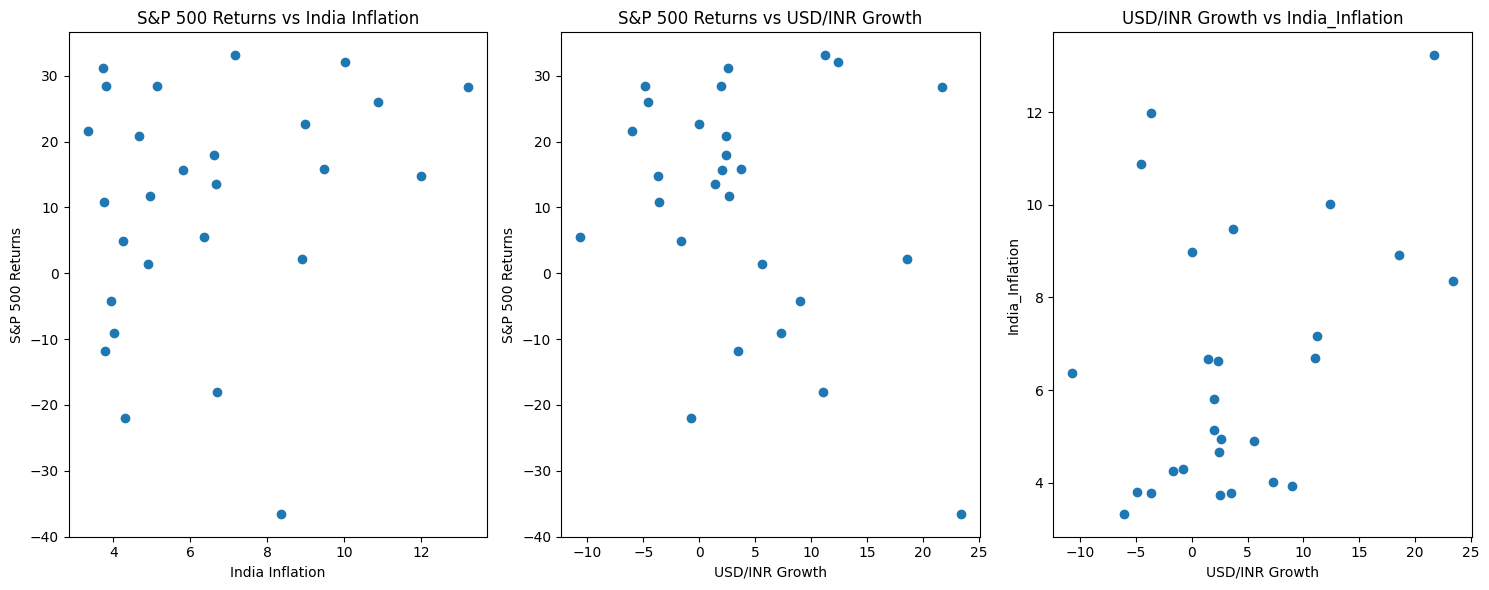

In [23]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6))

ax1.scatter(df['India_Inflation'], df['S&P_500_Returns'])
ax1.set_xlabel('India Inflation')
ax1.set_ylabel('S&P 500 Returns')
ax1.set_title('S&P 500 Returns vs India Inflation')

ax2.scatter(df['USD_INR_Growth'], df['S&P_500_Returns'])
ax2.set_xlabel('USD/INR Growth')
ax2.set_ylabel('S&P 500 Returns')
ax2.set_title('S&P 500 Returns vs USD/INR Growth')

ax3.scatter(df['USD_INR_Growth'], df['India_Inflation'])
ax3.set_xlabel('USD/INR Growth')
ax3.set_ylabel('India_Inflation')
ax3.set_title('USD/INR Growth vs India_Inflation')

plt.tight_layout()
plt.show()

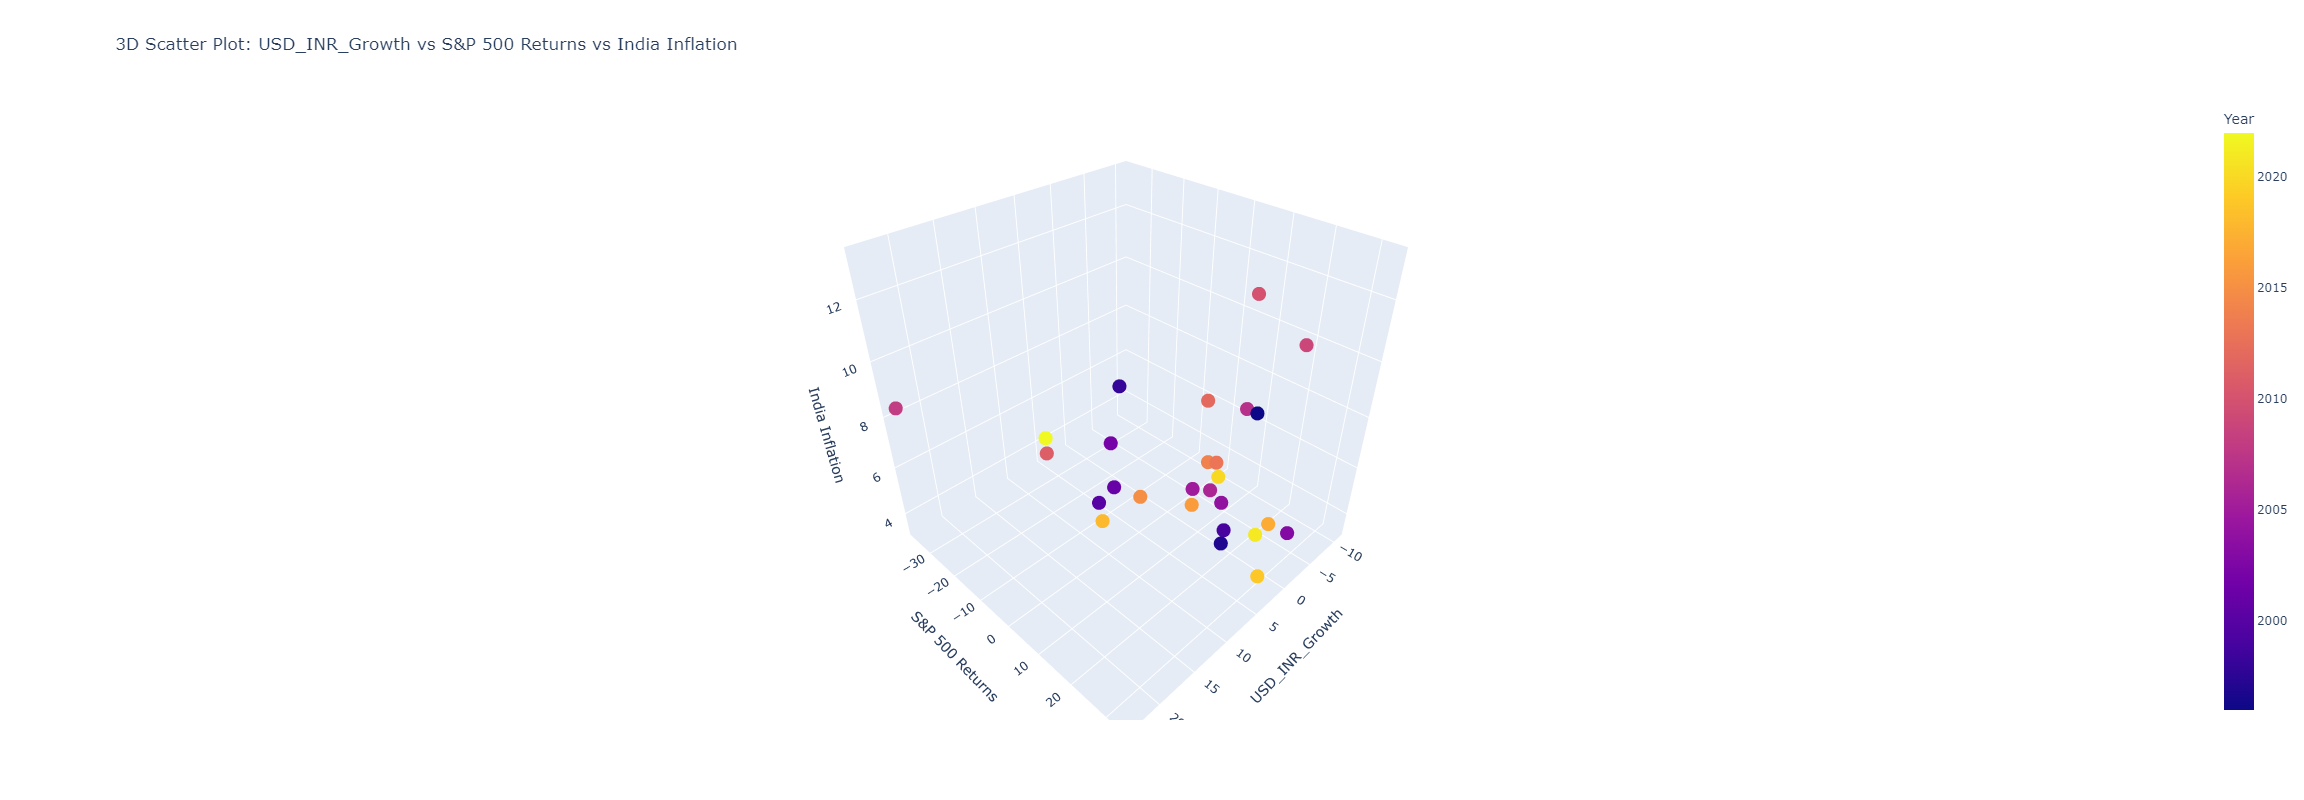

In [3]:
import plotly.express as px

# Interactive Plot
fig = px.scatter_3d(df, x='USD_INR_Growth', y='S&P_500_Returns', z='India_Inflation', 
                    color='Year', title='3D Scatter Plot: USD_INR_Growth vs S&P 500 Returns vs India Inflation')

fig.update_layout(scene = dict(
                    xaxis_title='USD_INR_Growth',
                    yaxis_title='S&P 500 Returns',
                    zaxis_title='India Inflation'),
                    width=1200, # Width of the plot
                    height=800 # Height of the plot
                 )

fig.show()


Degree 1 polynomial regression:
R² score: 0.1410
Coefficients: [1.11036307]
Intercept: -3.2616574973446073

Degree 2 polynomial regression:
R² score: 0.1470
Coefficients: [ 2.42050315 -0.08554635]
Intercept: -7.515739824300983

Degree 3 polynomial regression:
R² score: 0.1793
Coefficients: [16.07496289 -1.93366356  0.07630056]
Intercept: -37.746125166024775

Degree 4 polynomial regression:
R² score: 0.3218
Coefficients: [-1.04568584e+02  2.33259308e+01 -2.11926773e+00  6.73627734e-02]
Intercept: 163.06831402870077

Degree 5 polynomial regression:
R² score: 0.5030
Coefficients: [ 3.55133269e+02 -1.07390266e+02  1.55030753e+01 -1.06341423e+00
  2.77533849e-02]
Intercept: -448.93255471658375

The best polynomial degree based on R² score is: 5

Best model coefficients:
    β1: 355.1333
    β2: -107.3903
    β3: 15.5031
    β4: -1.0634
    β5: 0.0278
Intercept: -448.9326

Best fit equation:
USD/INR Growth = -448.9326 + (355.1333) * (India_Inflation)**1 + (-107.3903) * (India_Inflation)**2 +

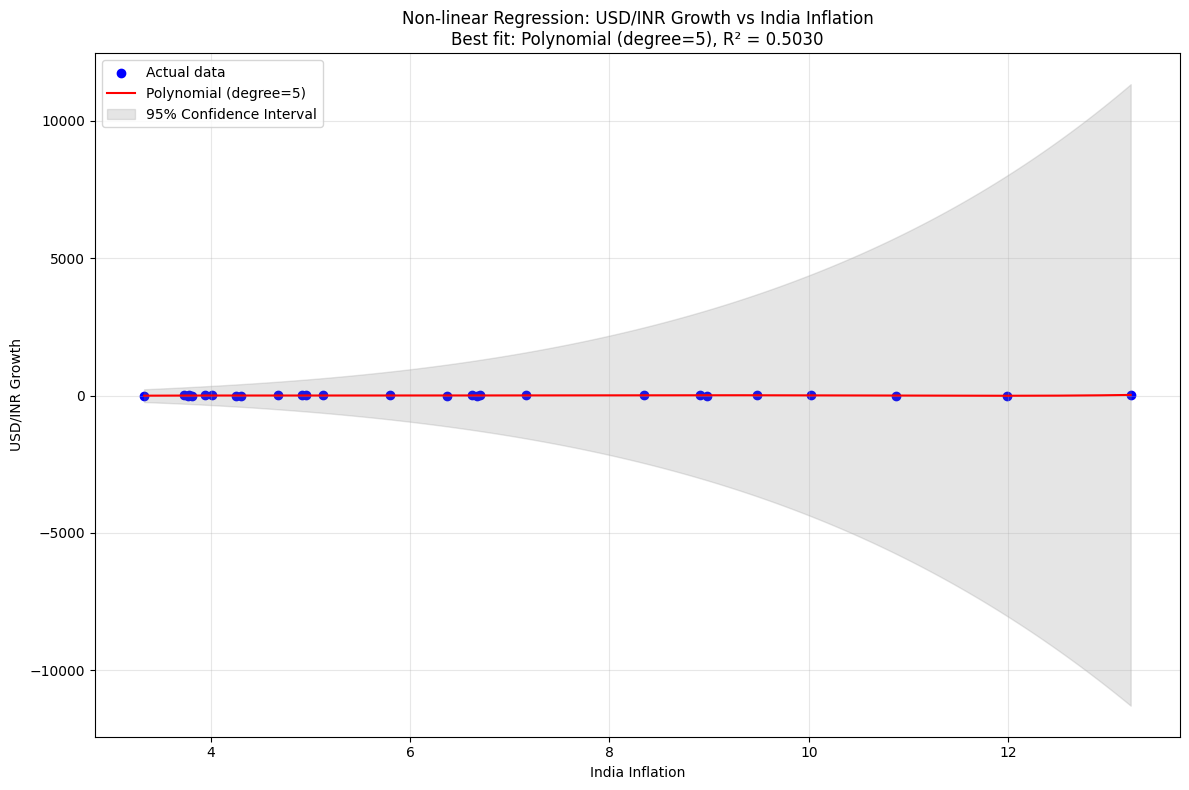

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats

# Using the data from the previous example
data = {
    'Year': list(range(2022, 1994, -1)),
    'India_Inflation': [
        6.70, 5.13, 6.62, 3.73, 3.94, 3.33, 4.95, 4.91, 6.67, 10.02, 
        9.48, 8.91, 11.99, 10.88, 8.35, 6.37, 5.80, 4.25, 3.77, 3.81, 
        4.30, 3.78, 4.01, 4.67, 13.23, 7.16, 8.98, 10.22
    ],
    'USD_INR_Rate': [
        82.717, 74.467, 73.036, 71.35, 69.56, 63.83, 67.945, 66.198, 62.68, 61.8,
        54.995, 53.015, 44.713, 46.41, 48.62, 39.405, 44.115, 43.25, 43.965, 45.625,
        47.95, 48.31, 46.68, 43.5, 42.47, 34.895, 31.369, 31.369
    ]
}

df = pd.DataFrame(data)

# Calculate USD/INR YoY Growth
# Calculate the percentage change on the reversed DataFrame
reversed_df['Pct_Change_Reversed'] = reversed_df['USD_INR_Rate'].pct_change() * 100

# Reverse the percentage change results back to the original order
df['USD_INR_Growth'] = reversed_df['Pct_Change_Reversed'].iloc[::-1].reset_index(drop=True)
df = df.dropna()  # Remove the first row which will have NaN for USD_INR_Growth

# Prepare the data
X = df['India_Inflation'].values.reshape(-1, 1)
y = df['USD_INR_Growth'].values

# Test polynomial regressions of degrees 1 to 5
degrees = [1, 2, 3, 4, 5]
r2_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)
    
    print(f"Degree {degree} polynomial regression:")
    print(f"R² score: {r2:.4f}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print()

# Find the best degree based on R² score
best_degree = degrees[np.argmax(r2_scores)]
print(f"The best polynomial degree based on R² score is: {best_degree}")

# Fit the best model
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly = poly_features.fit_transform(X)
best_model = LinearRegression().fit(X_poly, y)

print("\nBest model coefficients:")
for i, coef in enumerate(best_model.coef_, 1):
    print(f"    β{i}: {coef:.4f}")
print(f"Intercept: {best_model.intercept_:.4f}")

# Print the equation
equation = f"USD/INR Growth = {best_model.intercept_:.4f}"
for i, coef in enumerate(best_model.coef_, 1):
    equation += f" + ({coef:.4f}) * (India_Inflation)**{i}"
print("\nBest fit equation:")
print(equation)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Actual data')

# Generate points for smooth curve
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_smooth_poly = poly_features.transform(X_smooth)
y_smooth = best_model.predict(X_smooth_poly)

plt.plot(X_smooth, y_smooth, color='red', label=f'Polynomial (degree={best_degree})')

# Calculate confidence interval
y_pred = best_model.predict(X_poly)
n = len(X)
m = X_poly.shape[1]
dof = n - m
t = stats.t.ppf(0.975, dof)
residual = y - y_pred
mse = np.sum(residual**2) / dof
se = np.sqrt(np.diag(mse * np.linalg.inv(X_poly.T.dot(X_poly))))
se = np.sqrt(np.sum((X_smooth_poly * se)**2, axis=1))
ci = t * se

plt.fill_between(X_smooth.ravel(), y_smooth - ci, y_smooth + ci, color='gray', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('India Inflation')
plt.ylabel('USD/INR Growth')
plt.title(f'Non-linear Regression: USD/INR Growth vs India Inflation\nBest fit: Polynomial (degree={best_degree}), R² = {max(r2_scores):.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
equation

'USD/INR Growth = -448.9326 + (355.1333) * (India_Inflation)**1 + (-107.3903) * (India_Inflation)**2 + (15.5031) * (India_Inflation)**3 + (-1.0634) * (India_Inflation)**4 + (0.0278) * (India_Inflation)**5'

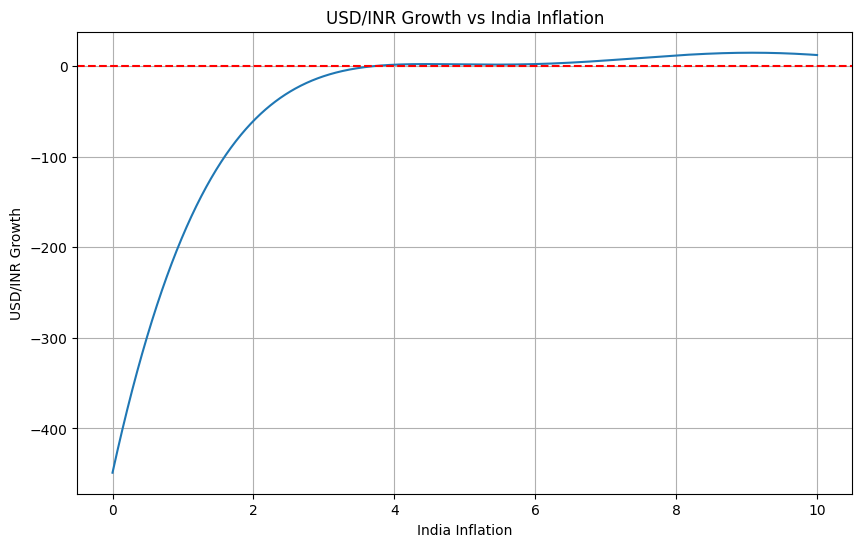

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def usd_inr_growth(India_Inflation):
    return -448.9326 + (355.1333) * (India_Inflation)**1 + (-107.3903) * (India_Inflation)**2 + (15.5031) * (India_Inflation)**3 + (-1.0634) * (India_Inflation)**4 + (0.0278) * (India_Inflation)**5
# Generate x values (India Inflation)
x = np.linspace(0, 10, 1000)  # Adjust range as needed

# Calculate y values (USD/INR Growth)
y = usd_inr_growth(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('USD/INR Growth vs India Inflation')
plt.xlabel('India Inflation')
plt.ylabel('USD/INR Growth')
plt.grid(True)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--')

plt.show()